In [52]:
!pip install h2o

In [53]:
import h2o

In [54]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 hours 28 mins
H2O cluster version:,3.16.0.3
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_community_3zc8uw
H2O cluster total nodes:,1
H2O cluster free memory:,25.78 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
#Import the appropriate libraries 
%matplotlib inline

import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate

In [8]:
# Task 2: Load data - 1 row per flight.  Has columns showing the origin,
# destination, departure and arrival time, carrier information, and
# whether the flight was delayed.
print("Import and Parse airlines data")
data = h2o.import_file(path='https://s3.amazonaws.com/h2o-airlines-unpacked/allyears2k.csv')

Import and Parse airlines data
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
data.col_names

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'IsArrDelayed',
 'IsDepDelayed']

In [11]:
data.ncol, data.nrow

(31, 43978)

In [12]:
data.describe()

Rows:43978
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-63.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.500000000007,1.4090909090909112,14.601073263904548,3.8206148528809805,1345.8466613820847,1313.222861430723,1504.6341303788763,1485.28916731093,,818.8429896766555,,124.81452913540394,125.02156260661943,114.3161110907823,9.3171119369843,10.00739065560008,,,730.1821905650545,5.3813680595305895,14.168634184732053,0.024694165264450407,,0.0024785119832643593,4.047800291055636,0.2893764692712416,4.855031904175528,0.017015560282100085,7.620060450016803,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3949.0,,475.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,369.0,201.0,323.0,14.0,373.0,,
sigma,6.344360901707364,1.8747113713439594,9.175790425861416,1.9050131191329,465.3408991242314,476.2511399926006,484.3474879035155,492.75043412270236,,777.404369163635,,73.97444166059002,73.40159463000958,69.63632951506123,29.84022196241487,26.438809042916432,,,578.4380082304231,4.201979939864828,9.9050857472043,0.15519314135784237,,0.049723487218862286,16.205729904484198,4.416779898734125,18.619776221475668,0.4039401821015119,23.487565874106227,,
zeros,0,0,0,0,0,569,0,569,,0,,0,0,0,1514,6393,,,0,623,557,42892,,43869,7344,8840,7388,8914,7140,,
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


In [13]:
# ----------

# 2- Data exploration and munging. Generate scatter plots 
# of various columns and plot fitted GLM model.

# Function to fit a GLM model and plot the fitted (x,y) values
def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

In [15]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

glm Model Build progress: |███████████████████████████████████████████████| 100%


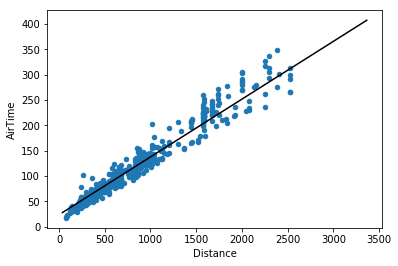

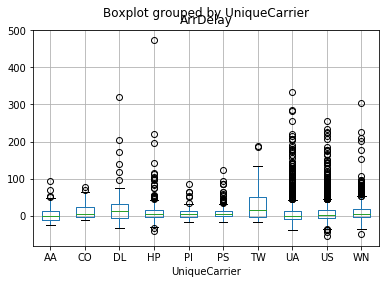

In [16]:
# Task 3: Generate scatterplots for "Distance" and "Airtime" and one for "Unique Carrier" and the "ArrDelay" 
scatter_plot(data, "Distance", "AirTime", fit = True)
scatter_plot(data, "UniqueCarrier", "ArrDelay", max_points = 5000, fit = False)

In [17]:
grouped = data.group_by("Month")

In [26]:
bpd = grouped.count().sum("Cancelled").frame
bpd.show()

bpd.describe()
bpd.dim

Month
1
10


Rows:2
Cols:1




,Month
type,int
mins,1.0
mean,5.5
maxs,10.0
sigma,6.363961030678928
zeros,0
missing,0
0,1.0
1,10.0


[2, 1]

In [27]:
# Task 5: Convert the "Year," "Month," "DayOfWeek," "Cancelled" columns to factors
data["Year"]      = data["Year"]     .asfactor()
data["Month"]     = data["Month"]    .asfactor()
data["DayOfWeek"] = data["DayOfWeek"].asfactor()
data["Cancelled"] = data["Cancelled"].asfactor()

In [31]:
data.show()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1987,10,14,3,741,730,912,849,PS,1451,NA,91,79,nan,23,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,15,4,729,730,903,849,PS,1451,NA,94,79,nan,14,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,17,6,741,730,918,849,PS,1451,NA,97,79,nan,29,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,18,7,729,730,847,849,PS,1451,NA,78,79,nan,-2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,19,1,749,730,922,849,PS,1451,NA,93,79,nan,33,19,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,21,3,728,730,848,849,PS,1451,NA,80,79,nan,-1,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,22,4,728,730,852,849,PS,1451,NA,84,79,nan,3,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,23,5,731,730,902,849,PS,1451,NA,91,79,nan,13,1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,24,6,744,730,908,849,PS,1451,NA,84,79,nan,19,14,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,25,7,729,730,851,849,PS,1451,NA,82,79,nan,2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%


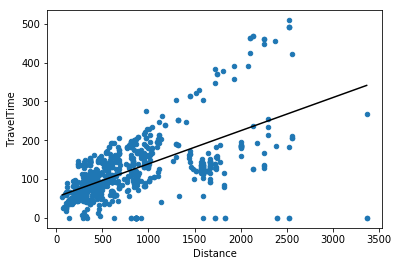

In [32]:
# Calculate and plot travel time
hour1 = data["CRSArrTime"] / 100
mins1 = data["CRSArrTime"] % 100
arrTime = hour1*60 + mins1

hour2 = data["CRSDepTime"] / 100
mins2 = data["CRSDepTime"] % 100
depTime = hour2*60 + mins2


data["TravelTime"] = (arrTime-depTime > 0).ifelse((arrTime-depTime), h2o.H2OFrame([[None]] * data.nrow))
scatter_plot(data, "Distance", "TravelTime")

glm Model Build progress: |███████████████████████████████████████████████| 100%


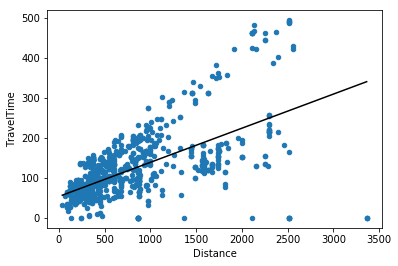

In [34]:
# Task 6: Impute missing travel times by the "Origin" and "Dest" columns and re-plot. 
data.impute(column = "Distance", by = ["Origin", "Dest"])
scatter_plot(data, "Distance", "TravelTime")

In [36]:
# Task 7: Create a test/train split
splits = data.split_frame([.75])
train = splits[0]
test = splits[1]

In [37]:
# Task 8: Set response variable and your choice of predictor variables
myY = "IsDepDelayed"
myX = ["Origin", "Dest", "Year", "UniqueCarrier", "DayOfWeek", "Month", "Distance", "FlightNum"]

In [38]:
# Task 9: Build simple GLM model

data_glm = H2OGeneralizedLinearEstimator(family="binomial", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [48]:
# Task 10: Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =100,
                                        max_depth      =1,
                                        nfolds         =10,
                                        distribution   ="bernoulli",
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [49]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.21784525581153677
RMSE: 0.4667389589605059
LogLoss: 0.625352345460766
Mean Per-Class Error: 0.34192319522550085
AUC: 0.7080667343567568
Gini: 0.41613346871351364
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41640097360591555: 


,NO,YES,Error,Rate
NO,2038.0,3238.0,0.6137,(3238.0/5276.0)
YES,835.0,4913.0,0.1453,(835.0/5748.0)
Total,2873.0,8151.0,0.3695,(4073.0/11024.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4164010,0.7069573,283.0
max f2,0.1956633,0.8454313,389.0
max f0point5,0.5373496,0.6744537,203.0
max accuracy,0.5373496,0.6565675,203.0
max precision,0.9060587,1.0,0.0
max recall,0.1514199,1.0,398.0
max specificity,0.9060587,1.0,0.0
max absolute_mcc,0.5373496,0.3163775,203.0
max min_per_class_accuracy,0.5212562,0.6520529,215.0
max mean_per_class_accuracy,0.5373496,0.6580768,203.0


Gains/Lift Table: Avg response rate: 52.14 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100689,0.8515017,1.7969368,1.7969368,0.9369369,0.9369369,0.0180932,0.0180932,79.6936812,79.6936812
,2,0.0200472,0.8223807,1.6563548,1.7269639,0.8636364,0.9004525,0.0165275,0.0346207,65.6354780,72.6963854
,3,0.0300254,0.8080580,1.6389195,1.6977044,0.8545455,0.8851964,0.0163535,0.0509743,63.8919466,69.7704390
,4,0.0404572,0.7969429,1.7511119,1.7114754,0.9130435,0.8923767,0.0182672,0.0692415,75.1111918,71.1475389
,5,0.0500726,0.7849400,1.5741127,1.6850978,0.8207547,0.8786232,0.0151357,0.0843772,57.4112735,68.5097778
,6,0.1005080,0.7344546,1.5246492,1.6045839,0.7949640,0.8366426,0.0768963,0.1612735,52.4649174,60.4583858
,7,0.1502177,0.6990564,1.4139148,1.5414881,0.7372263,0.8037440,0.0702853,0.2315588,41.3914837,54.1488071
,8,0.2001996,0.6699358,1.3748900,1.4998952,0.7168784,0.7820571,0.0687196,0.3002784,37.4889964,49.9895159
,9,0.2999819,0.6162008,1.2762649,1.4255095,0.6654545,0.7432718,0.1273486,0.4276270,27.6264946,42.5509542
,10,0.4003991,0.5725977,1.1521167,1.3569445,0.6007227,0.7075215,0.1156924,0.5433194,15.2116694,35.6944548


In [50]:
data_gbm.actual_params

{'balance_classes': True,
 'build_tree_one_node': False,
 'calibrate_model': False,
 'calibration_frame': None,
 'categorical_encoding': 'AUTO',
 'checkpoint': None,
 'class_sampling_factors': None,
 'col_sample_rate': 1.0,
 'col_sample_rate_change_per_level': 1.0,
 'col_sample_rate_per_tree': 1.0,
 'custom_metric_func': None,
 'distribution': 'bernoulli',
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'histogram_type': 'AUTO',
 'huber_alpha': 0.9,
 'ignore_const_cols': True,
 'ignored_columns': ['WeatherDelay',
  'LateAircraftDelay',
  'TaxiOut',
  'AirTime',
  'SecurityDelay',
  'DepDelay',
  'Diverted',
  'CRSElapsedTime',
  'IsArrDelayed',
  'CarrierDelay',
  'ActualElapsedTime',
  'DepTime',
  'TailNum',
  'TravelTime',
  'CRSArrTime',
  'DayofMonth',
  'CRSDepTime',
  'ArrDelay',
  'Cancelled',
  'ArrTime',
  'TaxiIn',
  'CancellationCode',
  'NASDelay'],
 'keep_cross_validation_fold_assignment': False,
 'keep_cross_validation_predictions': False,
 'learn_rate': 0.1,
 'learn_